# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns

In [29]:
from sklearn import datasets

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])

In [30]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [31]:
kmeans = KMeans(n_clusters=8).fit(X)
y_pred = kmeans.predict(X)

In [32]:
silhouette_score(X, y_pred)

0.5398971441034137

## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [33]:
kmeans = KMeans(n_clusters=5).fit(X)
y_pred = kmeans.predict(X)

In [34]:
silhouette_score(X, y_pred)

0.5489993239795691

## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [35]:
kmeans = KMeans(n_clusters=3).fit(X)
y_pred = kmeans.predict(X)

In [36]:
silhouette_score(X, y_pred) #so far the best result with k=3

0.5711381937868844

## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

<bound method Visualizer.poof of KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x0000022351CF2630>,
                 k=None, metric=None, model=None, timings=True)>

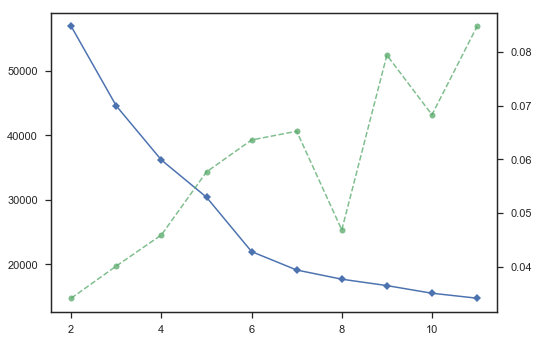

In [56]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))
visualizer.fit(X)
visualizer.poof

c:\users\regi_\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
c:\users\regi_\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
c:\users\regi_\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=Dep

<bound method Visualizer.poof of KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x0000022351B95F98>,
                 k=None, metric=None, model=None, timings=False)>

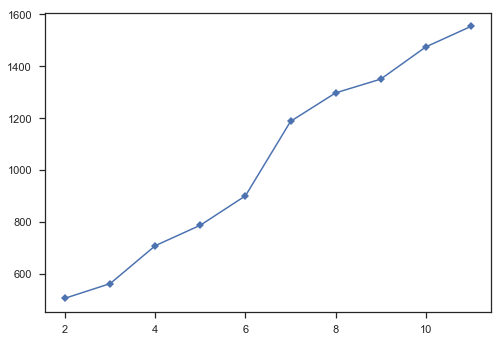

In [52]:
visualizer = KElbowVisualizer(model, k=(2,12), metric='calinski_harabaz', timings=False )
visualizer.fit(X)
visualizer.poof

<bound method Visualizer.poof of KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x0000022351BB8860>,
                 k=None, metric=None, model=None, timings=False)>

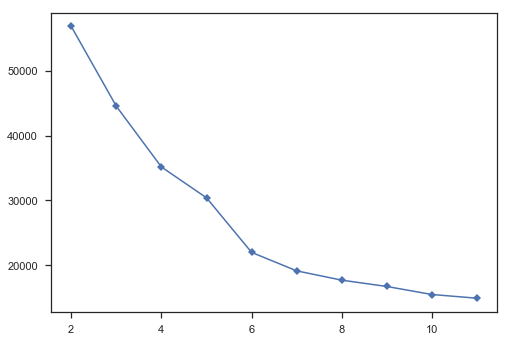

In [53]:
visualizer = KElbowVisualizer(model, k=(2,12), metric='distortion', timings=False )
visualizer.fit(X)
visualizer.poof

<bound method Visualizer.poof of KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x0000022351BEC2E8>,
                 k=None, metric=None, model=None, timings=False)>

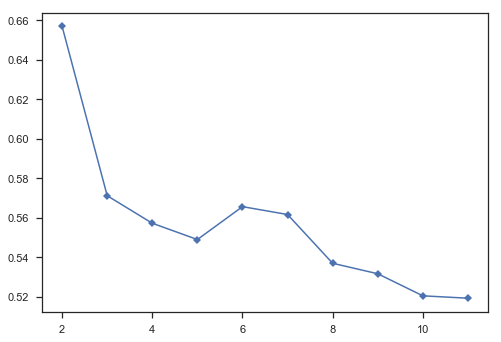

In [54]:
visualizer = KElbowVisualizer(model, k=(2,12), metric='silhouette', timings=False )
visualizer.fit(X)
visualizer.poof

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

<bound method Visualizer.poof of KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x0000022351C52908>,
                 k=None, metric=None, model=None, timings=True)>

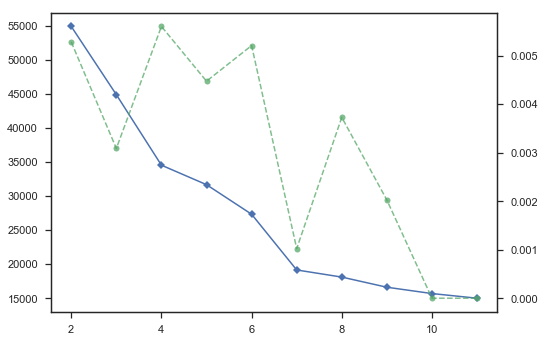

In [55]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(2,12))
visualizer.fit(X)
visualizer.poof 
#with kmeans model we had k=6 optimal number of clusters. With Agglomerative Clustering model k is 7.

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

In [42]:
# we will use K-means with k=3

In [57]:
kmeans = KMeans(n_clusters=3).fit(X)
y_pred = kmeans.predict(X)

In [58]:
X["labels"] = kmeans.labels_

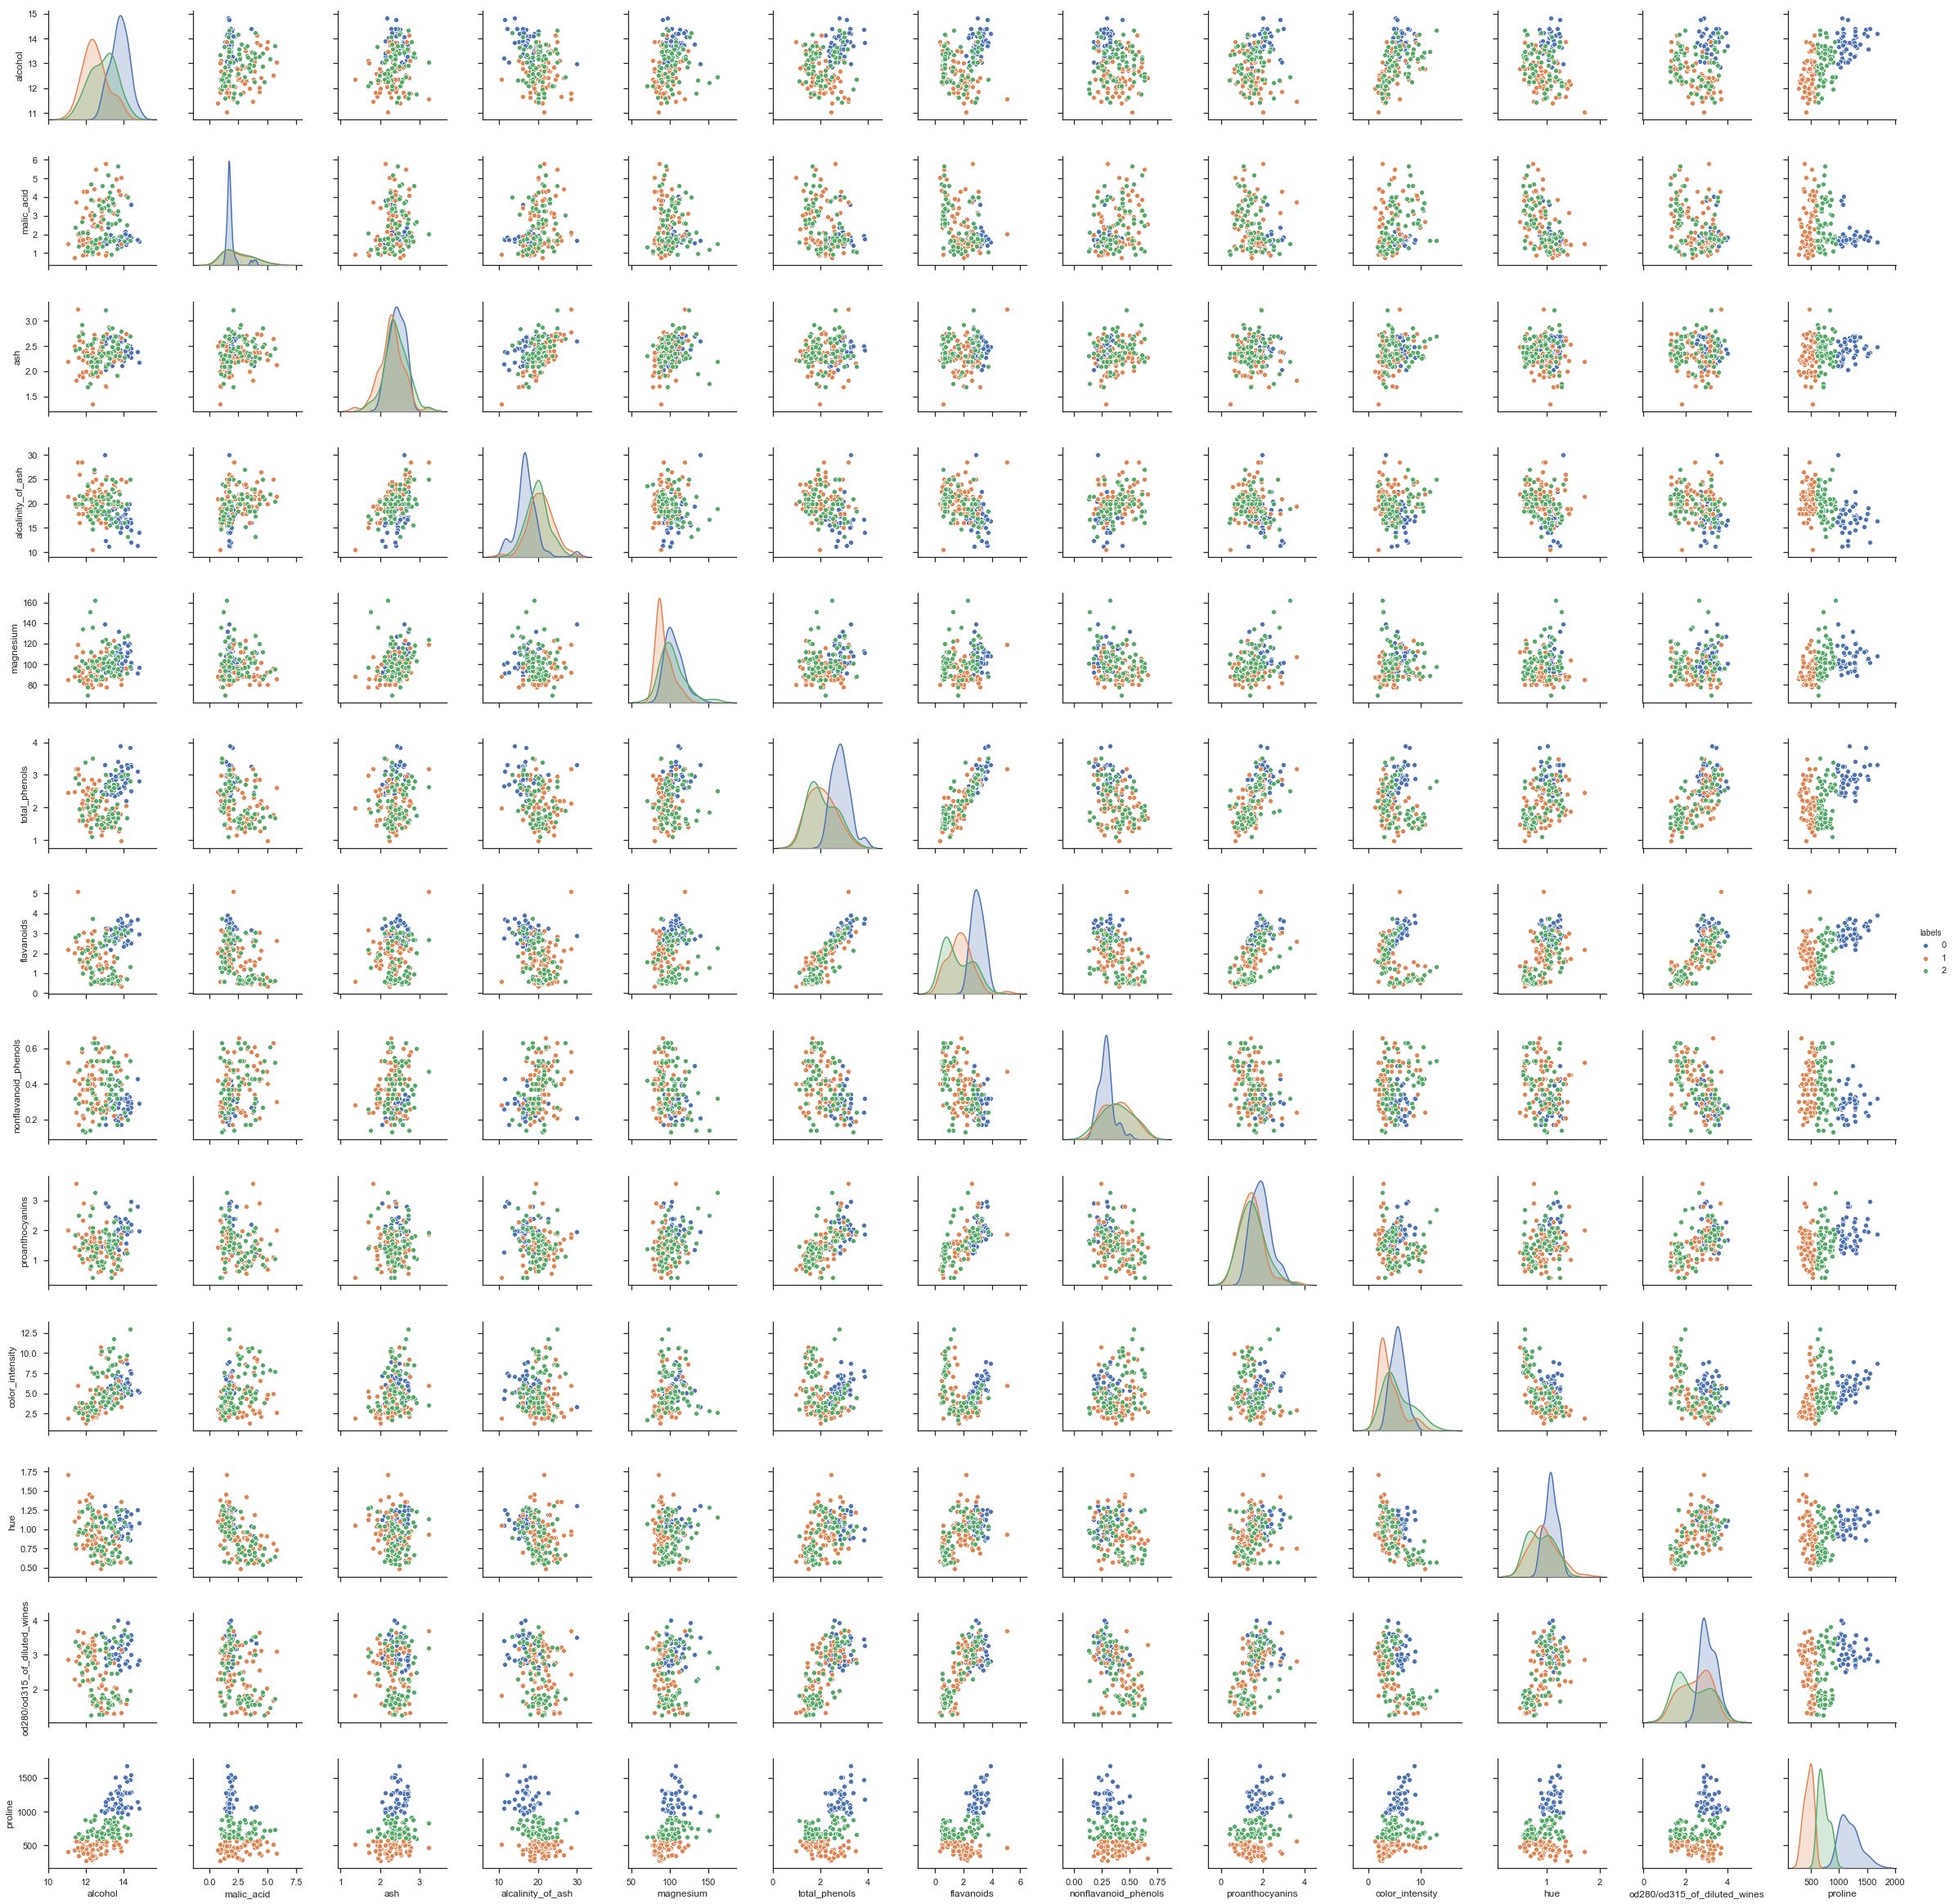

In [61]:
sns.set(style="ticks")
sns.pairplot(X, hue="labels", vars=data["feature_names"])

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

Text(0, 0.5, 'PCA 2')

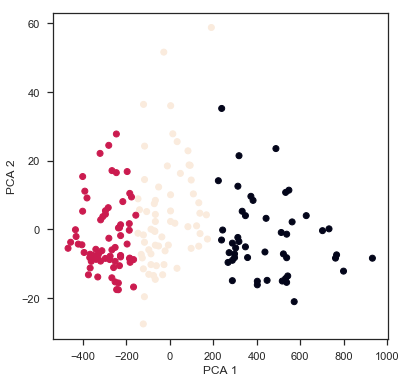

In [67]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)
pca_X = pca.transform(X)

fig = plt.figure(figsize=(6, 6))

plt.scatter(pca_X[:, 0], pca_X[:, 1], c = X['labels'])
plt.xlabel("PCA 1")
plt.ylabel("PCA 2") #k=3 makes sense in this data

## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.

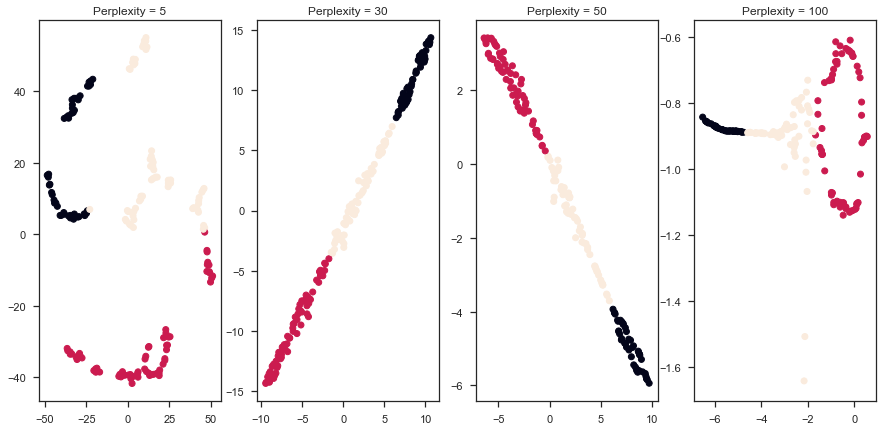

In [69]:
from sklearn.manifold import TSNE

fig, ax = plt.subplots(1, 4, figsize=(15, 7))
for i, perp in enumerate([5, 30, 50, 100]):
    tsne = TSNE(perplexity=perp)
    x_embedded = tsne.fit_transform(X)
    ax[i].scatter(x_embedded[:, 0], x_embedded[:, 1], c=X["labels"])
    ax[i].set_title("Perplexity = {}".format(perp))
    
plt.show() #k=3 makes sense for this data